In [42]:
import os
import pandas as pd
import numpy as np
import pathlib
import xarray as xr
import rioxarray


#### 1- 读取原始文件

In [43]:
read_file_path: str = r'./../data/NMF_TRN_OSTZSS_CSDT_2023060112_168h_SS_maxSurge.txt'
# 读取含中文表头的 tab
with open(read_file_path, 'rb') as f:
    # pandas.core.frame.DataFrame
    data: pd.core.frame.DataFrame = pd.read_csv(f, encoding='gbk', sep='\s+', header=None,
                                                infer_datetime_format=False)
    # 此处需要加入对原矩阵的转置操作
    data_T: pd.DataFrame = data.transpose()
    print('读取成功')


读取成功


填充缺省值

In [44]:
data_T=data_T[data_T!=999.0]

In [45]:
data_T

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0125,0.0114,0.0101,0.0087,0.0074,0.0063,0.0050,0.0034,0.0017,0.0
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0107,0.0098,0.0087,0.0074,0.0063,0.0054,0.0044,0.0030,0.0015,0.0
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0078,0.0072,0.0064,0.0055,0.0047,0.0041,0.0034,0.0024,0.0012,0.0
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0041,0.0038,0.0034,0.0030,0.0026,0.0022,0.0018,0.0013,0.0007,0.0


### 2- 生成经纬度数组

In [46]:
# 定义经纬度数组
# 注意经纬度网格的 长宽 无问题，但是范围有问题
# 220
# lon=np.linspace(105,127,250)
# 此处存在问题，左上角应为最大值
lon = np.arange(105, 127, 0.1)
# 250
# lat=np.linspace(16,41,220)
lat = np.arange(41, 16, -0.1)


In [47]:
# ValueError: conflicting sizes for dimension 'lon': length 220 on the data but length 250 on coordinate 'lon'
da = xr.DataArray(data_T, coords=[lat, lon], dims=['lat', 'lon'])
da


<xarray.DataArray (lat: 250, lon: 220)>
array([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       ...,
       [   nan,    nan,    nan, ..., 0.0024, 0.0012, 0.    ],
       [   nan,    nan,    nan, ..., 0.0013, 0.0007, 0.    ],
       [   nan,    nan,    nan, ..., 0.    , 0.    , 0.    ]])
Coordinates:
  * lat      (lat) float64 41.0 40.9 40.8 40.7 40.6 ... 16.5 16.4 16.3 16.2 16.1
  * lon      (lon) float64 105.0 105.1 105.2 105.3 ... 126.6 126.7 126.8 126.9

### 将`Dataarray`转换为`Dataset` 

In [48]:
ds = xr.Dataset({'max_surge': da})


In [49]:
ds

<xarray.Dataset>
Dimensions:    (lat: 250, lon: 220)
Coordinates:
  * lat        (lat) float64 41.0 40.9 40.8 40.7 40.6 ... 16.4 16.3 16.2 16.1
  * lon        (lon) float64 105.0 105.1 105.2 105.3 ... 126.6 126.7 126.8 126.9
Data variables:
    max_surge  (lat, lon) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0

In [50]:
ds.to_netcdf('NMF_TRN_OSTZSS_CSDT_2023060112_168h_SS_maxSurge.nc', format='NETCDF4', mode='w')

In [51]:
ds_sorted_y=ds

* 注意此处存在的问题是不论 ds 与 ds_sorted_y 使用 plot 绘图均为同一张图

### step3- 对经纬度信息进行标准化

In [52]:
ds_sorted_y['lat'].attrs['axis'] = 'Y'
ds_sorted_y['lat'].attrs['units'] = 'degrees_north'
ds_sorted_y['lat'].attrs['long_name'] = 'latitude'
ds_sorted_y['lat'].attrs['standard_name'] = 'latitude'


In [53]:
ds_sorted_y['lon'].attrs['axis'] = 'X'
ds_sorted_y['lon'].attrs['units'] = 'degrees_east'
ds_sorted_y['lon'].attrs['long_name'] = 'longitude'
ds_sorted_y['lon'].attrs['standard_name'] = 'longitude'

In [54]:
ds_sorted_y.to_netcdf('NMF_TRN_OSTZSS_CSDT_2023060112_168h_SS_maxSurge_stand.nc', format='NETCDF4', mode='w')


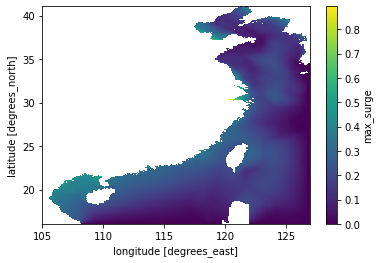

In [55]:
ds_sorted_y['max_surge'].plot()

#### step-4 根据当前规范化后的nc提取为tiff

In [56]:
ds_sorted_y=ds_sorted_y.rio.write_crs("epsg:4326", inplace=True)

In [57]:
ds_sorted_y.rio.to_raster(r'max_surge_sorted_y.tif')